In [9]:
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

Above is how we import modules that have various packages.

Not we can grab some data from IRIS and plot it.


In [10]:
client= Client('IRIS')
stime = UTCDateTime('2011-070T05:40:01')
etime = stime + 6*60*60
st = client.get_waveforms("IU", "ANMO", "00",
                           "LHZ", stime, etime, attach_response = True)



We should first see what we got from when we grabbed the data

In [11]:
print(st)


1 Trace(s) in Stream:
IU.ANMO.00.LHZ | 2011-03-11T05:40:01.069538Z - 2011-03-11T11:40:00.069538Z | 1.0 Hz, 21600 samples


So we have one trace in our stream and our trace has the following:

In [12]:
print(st[0].stats)

               network: IU
               station: ANMO
              location: 00
               channel: LHZ
             starttime: 2011-03-11T05:40:01.069538Z
               endtime: 2011-03-11T11:40:00.069538Z
         sampling_rate: 1.0
                 delta: 1.0
                  npts: 21600
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 139, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 71168})
            processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2011, 3, 11, 11, 40, 1, 69538)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2011, 3, 11, 5, 40, 1, 69538))']
              response: Channel Response
	From m/s (Velocity in Meters Per Second) to counts (Digital Counts)
	Overall Sensitivity: 3.25959e+09 defined at 0.020 Hz
	3 stages:
		Stage 1: PolesZerosRespons

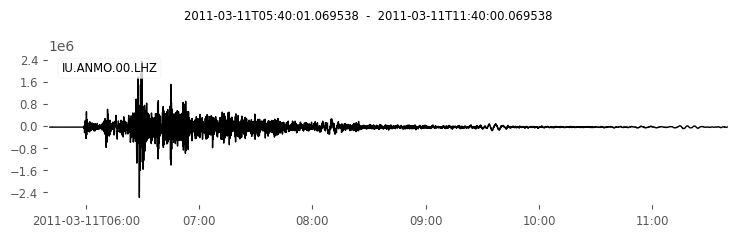

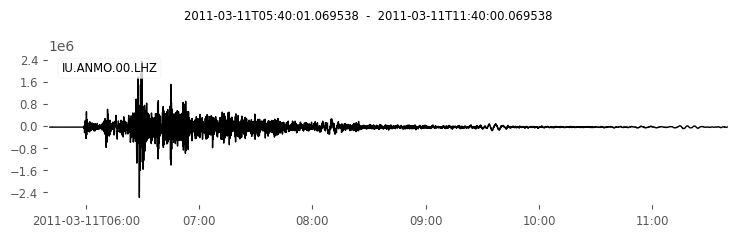

In [13]:
st.plot()


What are the units of the above?  What earthquake is this?

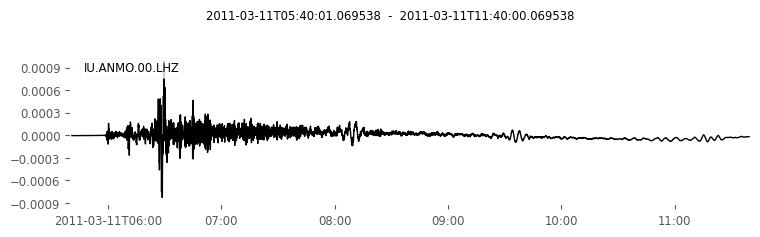

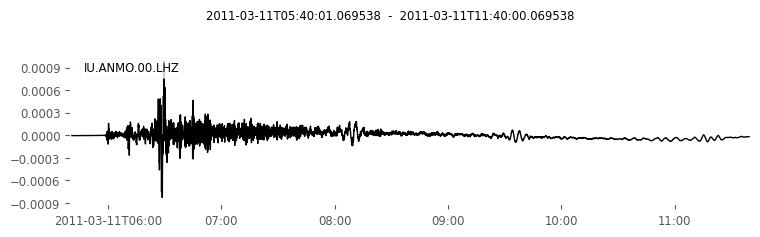

In [14]:
st.remove_response()
st.plot()

Okay, what are the units in the above plots?

In [15]:
st.filter('bandpass', freqmin=0.001, freqmax=0.003)

1 Trace(s) in Stream:
IU.ANMO.00.LHZ | 2011-03-11T05:40:01.069538Z - 2011-03-11T11:40:00.069538Z | 1.0 Hz, 21600 samples

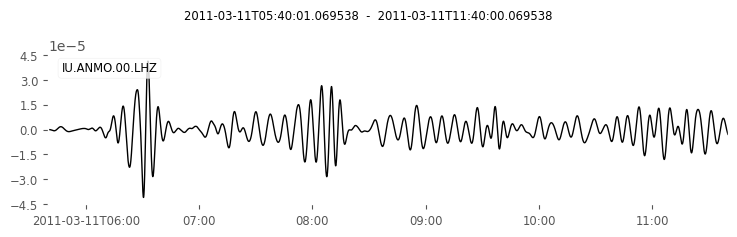

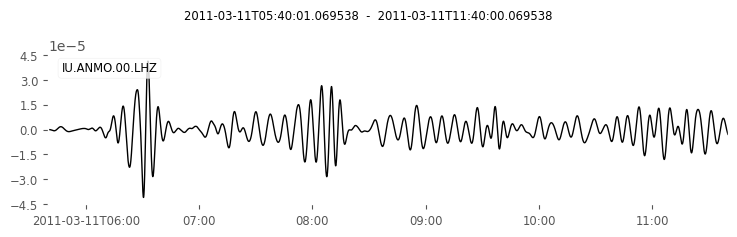

In [16]:
st.plot()

What do we have going on above?